In [3]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from gensim.models import Word2Vec  # 워드임베딩
from sklearn.cluster import KMeans  # 클러스터링 기법
from sklearn.preprocessing import StandardScaler  # 데이터 스케일링
from sklearn.metrics import silhouette_score  # 군집화 평가지표

In [57]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
from platform import python_version

print(python_version())

3.9.12


In [49]:
print(pd.__version__)
print(np.__version__)

1.4.2
1.21.5


In [6]:
import copy

review_sy = copy.deepcopy(pd.read_csv('C:/Users/LG/PycharmProjects/datanalysis_recipe/visualization/p2_data_preprocessing/data/recipe_review_preprocessing_1202.csv'))  # 상대경로로 수정
review_sy.head(3)

,Unnamed: 0,index,닉네임,작성날짜,작성시간,별점,내용,내용_전처리
0,0,2,신희정,2022-05-19,23:59:23,5,"고기 아무거나(삼겹살, 우삼곂, 다진고기, 목살) 해도 맛있습니다.^^ 보통 2배 ...","['두부', '오늘', '맛있', '레시피', '아들', '우삼', '삼겹살', '..."
1,1,2,BBang❤️,2019-04-21,13:26:35,5,삼삼하니 맛있네요 ㅎㅎ 저흰 굴소스 조금 넣어서 먹었는데 맛있었어요 ㅎㅎ 좋은 레시...,"['레시', '소스', '맛있', '감사']"
2,2,2,이지행,2019-11-28,21:04:59,5,우와\r\n애기가 밥 잘 안먹으려고 하는데\r\n한그를반이나 먹었네요\r\n짱입니다...,"['아기', '감사']"


In [7]:
type(review_sy)

pandas.core.frame.DataFrame

- 클러스터링의 input값으로 recipe & review 이었는지? (기억이 안남..)
- 일단은 review만으로 진행, 필요하면 recipe도 추가!

## 워드임베딩
데이터의 '내용_전처리' 컬럼에 들어있는 단어들을 벡터화(숫자로바꾸기).  
[한국어임베딩](https://ratsgo.github.io/embedding/)

In [30]:
import ast

def func(obj):
    List = []
    for i in ast.literal_eval(obj):
        List.append(i['name'])
    return List

In [39]:
input_txt = []

for idx, row in review_sy.iterrows():
    try: 
        ini_list = row['내용_전처리']
        res = ast.literal_eval(ini_list)  # ast.literal_eval takes a string and return the python evaluated object
        if row['내용_전처리'] == 'nan':
            pass
        else:
            input_txt.append(res)
        
    # print(idx, res)
    except Exception:
        # print(Exception)
        # print("row 내용_전처리:", row['내용_전처리'])
        continue

In [40]:
input_txt

[['두부', '오늘', '맛있', '레시피', '아들', '우삼', '삼겹살', '고기', '목살', '남편', '분량', '양념'],
 ['레시', '소스', '맛있', '감사'],
 ['아기', '감사'],
 ['밑간', '괜찮', '마늘', '냄새', '맛나', '애반찬', '고기', '아이'],
 ['두부', '맛있', '고기', '싱겁', '불고기', '양념'],
 ['아기', '맛있', '두부', '진짜'],
 ['어가',
  '고민',
  '유일',
  '괜찮',
  '두부',
  '고스',
  '맛있',
  '추가',
  '좋아하',
  '딸랑',
  '레시핍니더',
  '나중',
  '댓글',
  '밥반',
  '진짜'],
 ['어기',
  '진액',
  '스푼',
  '매실',
  '어리',
  '맛있',
  '먹네',
  '입맛',
  '냉장',
  '간장',
  '저희',
  '보관',
  '생두부'],
 ['두부', '세배', '말씀', '맛있', '입맛', '싱겁', '비주얼', '양념'],
 ['나네', '이번', '맛있', '돼지고기', '소고기', '지난번'],
 ['아니', '맛있', '부치', '반찬', '어른'],
 ['감사', '맛있', '추가', '댓글', '소스', '감칠맛'],
 ['오늘', '감사', '빠르', '건강', '아이', '저녁'],
 ['어떻',
  '고민',
  '최고',
  '먹이',
  '두부',
  '레시',
  '감사',
  '먹네',
  '기랑',
  '아기',
  '소고',
  '소고기',
  '진짜'],
 ['감사', '맛있', '조림', '정도', '남편', '진짜'],
 ['두부', '아이', '반찬', '맛나', '영양가', '아기', '고기', '그램', '어른', '비비'],
 ['아빠', '들어가', '반근', '좋아하', '추천', '요리', '이상', '아이', '양념'],
 ['감사', '먹네', '완성요', '두부사', '아이'],
 ['개월', '주먹밥', '고맙', 

In [42]:
model = Word2Vec(sentences = input_txt, vector_size=200, window=5, min_count=1, workers=4, sg=1)
                # sg=0는 CBOW, sg=1는 skip-gram
                
model.wv.vectors.shape  # 완성된 임베딩 메트릭스 크기 확인

(8524, 200)

In [43]:
model.wv.most_similar("감자")  # 명사

[('갈치', 0.9215406179428101),
 ('연근', 0.9184281826019287),
 ('우엉', 0.918052077293396),
 ('소고', 0.9061245322227478),
 ('기장', 0.885136067867279),
 ('호박', 0.8822522759437561),
 ('오징어', 0.8748597502708435),
 ('콩나물', 0.8734934329986572),
 ('비린내', 0.8688302040100098),
 ('원하', 0.8676041960716248)]

In [45]:
model.wv.most_similar("맛있")  # 형옹사

[('맛나', 0.9359120726585388),
 ('나네', 0.8587000370025635),
 ('공유', 0.8509818315505981),
 ('최고예요', 0.847934901714325),
 ('무침', 0.8439443111419678),
 ('대박이', 0.8436152935028076),
 ('새롭', 0.8408078551292419),
 ('무생채', 0.8377233147621155),
 ('잇네', 0.8344762325286865),
 ('맛나네요', 0.8342759013175964)]

In [52]:
# 불필요한 메모리 unload
model.init_sims(replace=True)

# 모델저장
model_name = 'review_w2v'
model.save(model_name)

C:\Users\LG\AppData\Local\Temp\ipykernel_34028\4073157398.py:2: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


In [ ]:
# 데이터 벡터화?
def makeFeatureVec(words,model,num_features):

    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0
    index2word_set = set

## kmeans 클러스터링
kmeans는 numeric value에 대해서만 가능.
따라서, 내용_전처리를 앞단계에서 워드임베딩.  

코드만 넣어놓았고, 내용은 수정필요!

In [53]:
# input으로 넣을 변수가 있는 column만을 데이터셋에서 추출하여 저장. cols에 들어갈 w2v값을 어떻게 넣지?
selected_cols = ['별점'] 
cluster_data = review_sy.loc[:,selected_cols]

In [54]:
# w2v이 들어있다는 가정하에
scaler = StandardScaler()
normalized_df = scaler.fit_transform(cluster_data)

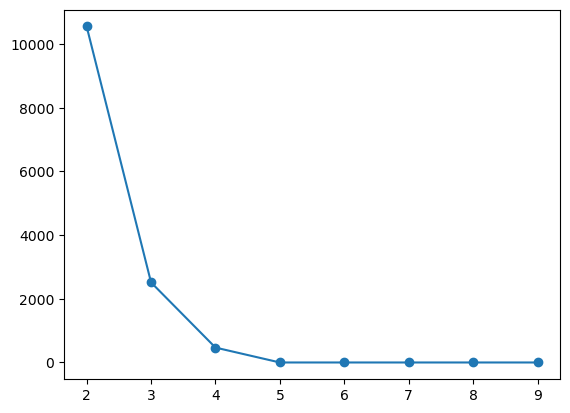

In [60]:
# finding optimum number

clusters_range = list(range(2,10))  # 클러스터 후보군
inertias = []  

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, init='k-means++', max_iter=300, random_state=42).fit(normalized_df)  # data normalization
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range, inertias, marker = 'o')
plt.show()

In [ ]:
# use silhouetter value method for evaluation

results = []
for c in clusters_range:
    clusterer =  KMeans(n_clusters=c, init='k-means++', n_init=100, random_state=42)
    cluster_labels = clusterer.fit_predict(normalized_df)
    silhouette_avg = silhouette_score(normalized_df, cluster_labels)
    results.append([c,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_kmeans = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.figure()
sns.heatmap(pivot_kmeans, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [ ]:
# fitting kmeans for "k" clusters

model_kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=42).fit(normalized_df)
labels = pd.DataFrame(model_kmeans.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

sns.scatterplot(clustered_data, h='Cluster')